In [47]:
import torch
import torchvision 
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [6]:
 train_set = torchvision.datasets.FashionMNIST(
 root= "MNIST/",
     train  = True ,
     download =  True,
     transform = transforms.Compose([
         transforms.ToTensor()
     ])
 )

96.1%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

111.0%

Extracting MNIST/FashionMNIST\raw\train-labels-idx1-ubyte.gz to MNIST/FashionMNIST\raw


100.0%

Extracting MNIST/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to MNIST/FashionMNIST\raw


159.1%

Extracting MNIST/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST/FashionMNIST\raw
Processing...
Done!


C:\Users\Thirunayan\anaconda3\envs\pytorch_learn_env\lib\site-packages\torchvision\datasets\mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [9]:
train_loader = torch.utils.data.DataLoader(train_set,batch_size=1000,shuffle=True)

In [14]:
len(train_set)

60000

In [16]:
train_set.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [17]:
#Checking number of individual labels
train_set.targets.bincount()

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [21]:
sample = next(iter(train_set))
len(sample)

2

In [29]:
type(sample)

tuple

In [43]:
image,label = sample
print(torch.tensor(label).shape)
print(image.shape)

torch.Size([])
torch.Size([1, 28, 28])


In [42]:
type(label)

int

In [45]:
#Removing color channel dimension from image using squeeze
image.squeeze().shape

torch.Size([28, 28])

tensor(9)


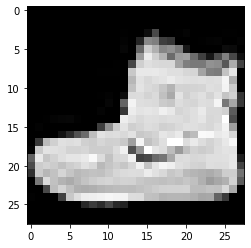

In [49]:
plt.imshow(image.squeeze(),cmap="gray")
print(torch.tensor(label))

In [50]:
display_loader = torch.utils.data.DataLoader(train_set,batch_size=10)

In [53]:
print(len(display_loader))

6000


In [60]:
batch  = next(iter(display_loader))
images,labels = batch
print("types: ",type(images),type(labels))
print("shapes: ",images.shape,labels.shape )

types:  <class 'torch.Tensor'> <class 'torch.Tensor'>
shapes:  torch.Size([10, 1, 28, 28]) torch.Size([10])


labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


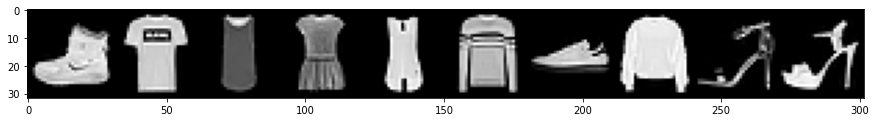

In [63]:
grid = torchvision.utils.make_grid(images,nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(grid.permute(1,2,0))

print("labels:",labels)

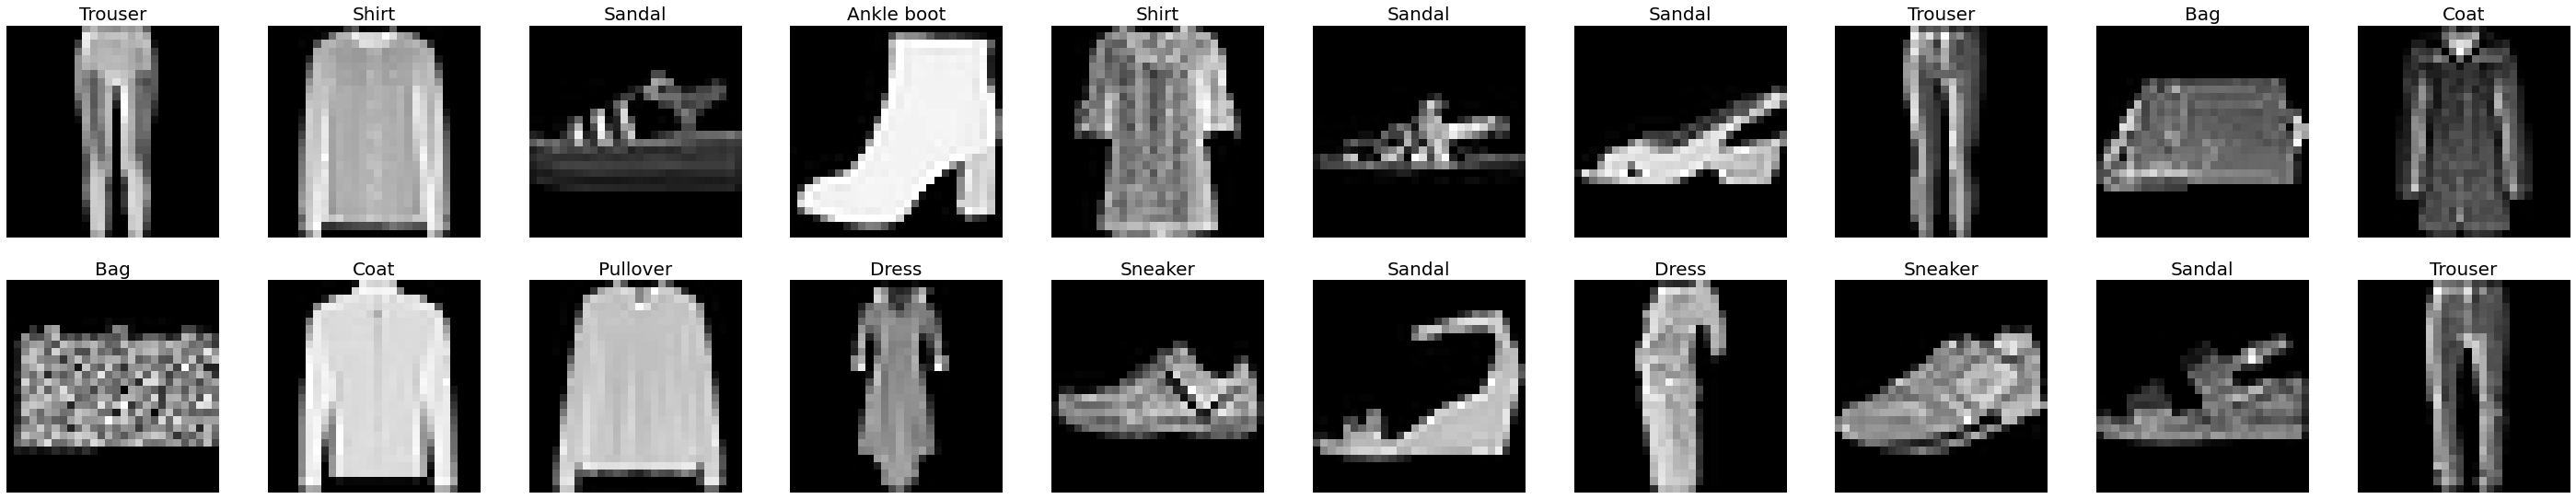

In [65]:
#Alternate method to plot data
num_plot = 20
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=1, shuffle=True 
)
plt.figure(figsize=(50,50))
for i,batch in enumerate(train_loader,start=1):
    image,label = batch
    plt.subplot(10,10,i)
    plt.imshow(image.reshape(28,28),cmap="gray")
    plt.axis("off")
    plt.title(train_set.classes[label.item()],fontsize=20)
    
    if(i>= num_plot):break
plt.show()

In [67]:
train_set.classes[1]

'Trouser'